<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>March and April 2018: cleanup
<br>November 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Pascal array $\mathcal{P}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha, beta

init_printing()

In [2]:
import functions_catalog

from matrix_functions import *
from commons import *
from sequences import *

# Pascal array $\mathcal{P}$

In [3]:
m=8

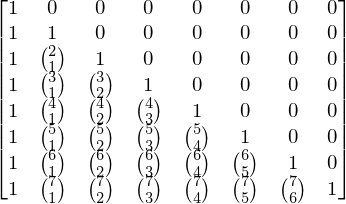

In [4]:
P_ = Matrix(m,m, lambda n,k: binomial(n, k, evaluate=k >= n or not k))
P_ # not usable in the framework because not a definition in equality style

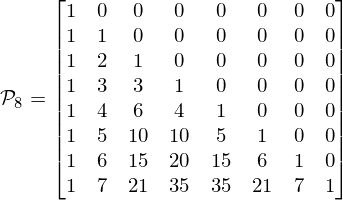

In [55]:
P = define(Symbol(r'\mathcal{{P}}_{{ {} }}'.format(m)), Matrix(m,m,binomial))
P

In [56]:
eigendata = spectrum(P)
eigendata

In [57]:
data, eigenvals, multiplicities = eigendata.rhs # unpacking to use `eigenvals` in `subs`

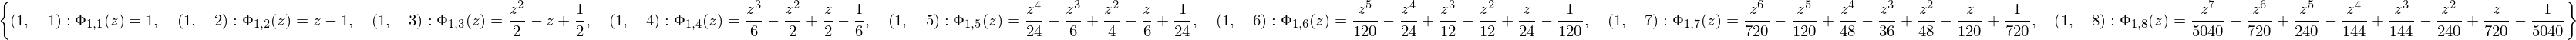

In [58]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

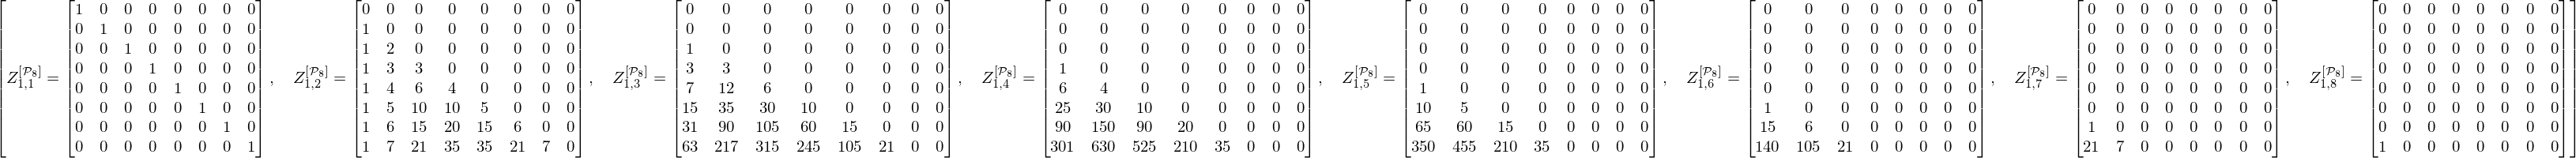

In [59]:
cmatrices = component_matrices(P, Phi_polynomials)
list(cmatrices.values())

## `power` function

In [10]:
f_power, g_power, G_power = functions_catalog.power(eigendata, Phi_polynomials)

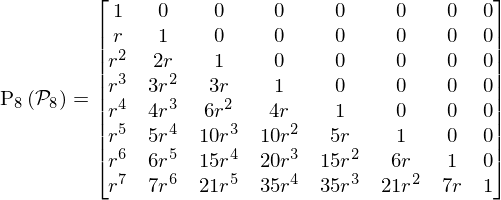

In [11]:
P_power = G_power(P)
P_power

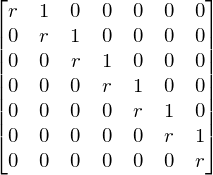

In [12]:
production_matrix(P_power.rhs)

In [13]:
assert P_power.rhs == (P.rhs**r).applyfunc(simplify)

## `inverse` function

In [14]:
f_inverse, g_inverse, G_inverse = functions_catalog.inverse(eigendata, Phi_polynomials)

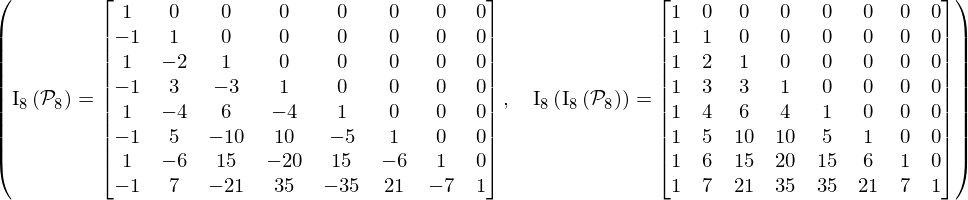

In [15]:
P_inverse = G_inverse(P)
P_inverse, G_inverse(P_inverse)

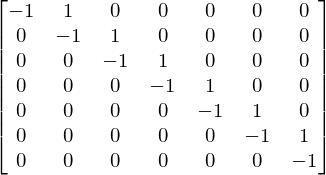

In [16]:
production_matrix(P_inverse.rhs)

In [17]:
assert (P_inverse.rhs * P.rhs) == Matrix(m, m, identity_matrix())
assert P_inverse.rhs == P.rhs**(-1)
assert P_inverse.rhs == P_power.rhs.subs({r:-1})

## `sqrt` function

In [18]:
f_sqrt, g_sqrt, G_sqrt = functions_catalog.square_root(eigendata, Phi_polynomials)

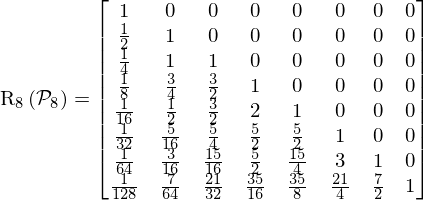

In [19]:
P_sqrt = G_sqrt(P)
P_sqrt

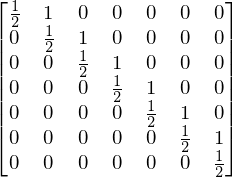

In [20]:
production_matrix(P_sqrt.rhs)

In [21]:
assert P_sqrt.rhs == P.rhs**(S(1)/2)
assert P_sqrt.rhs * P_sqrt.rhs == P.rhs
assert P_sqrt.rhs == P_power.rhs.subs({r:S(1)/2})

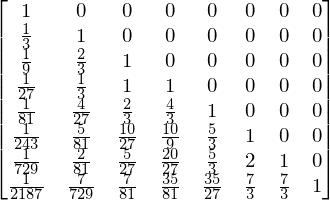

In [22]:
P_power.rhs.subs({r:S(1)/3})

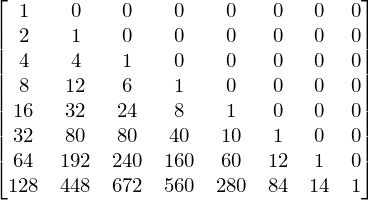

In [23]:
P_power.rhs.subs({r:2})

In [24]:
inspect(_)

nature(is_ordinary=True, is_exponential=True)

## `expt` function

In [25]:
f_exp, g_exp, G_exp = functions_catalog.exp(eigendata, Phi_polynomials)

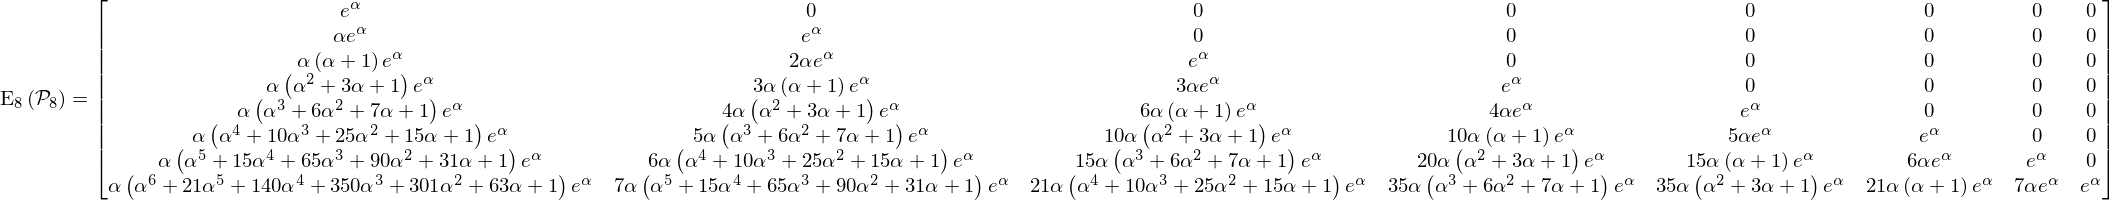

In [26]:
P_exp = G_exp(P)
P_exp

In [27]:
inspect(P_exp.rhs)

nature(is_ordinary=False, is_exponential=True)

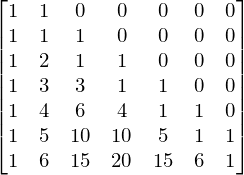

In [28]:
production_matrix(P_exp.rhs.subs({alpha:1})) # faster than `production_matrix(P_exp.rhs).subs({alpha:1})`

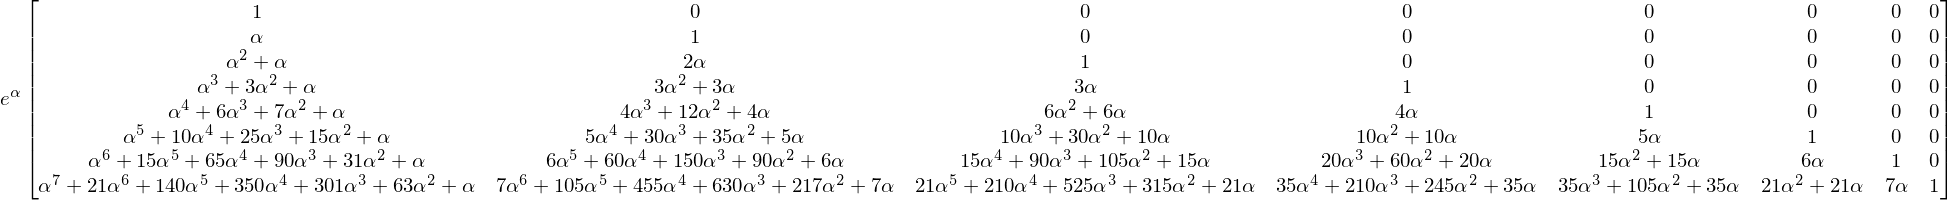

In [29]:
simp_P_expt = Mul(exp(alpha), P_exp.rhs.applyfunc(lambda c: (c/exp(alpha)).expand()), evaluate=False)
simp_P_expt

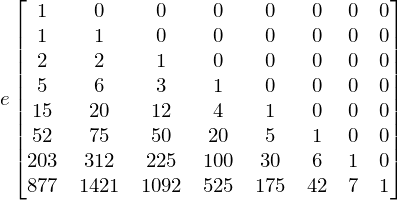

In [30]:
simp_P_expt.subs({alpha:1})

In [31]:
from sympy.functions.combinatorial.numbers import stirling

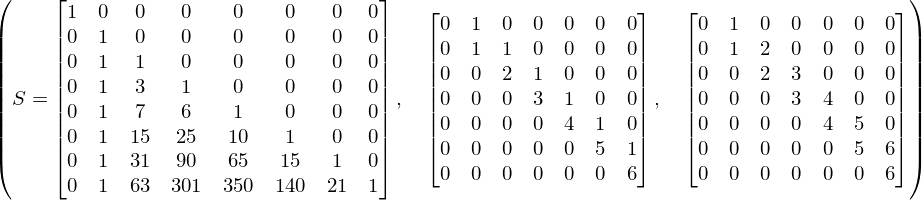

In [32]:
S = Matrix(m, m, lambda n,k: stirling(n,k, kind=2))
define(Symbol('S'), S), production_matrix(S), production_matrix(S, exp=True)

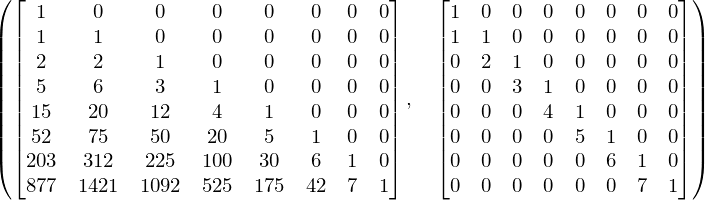

In [33]:
S*P.rhs*S**(-1), S**(-1)*P.rhs*S

## `log` function

In [34]:
f_log, g_log, G_log = functions_catalog.log(eigendata, Phi_polynomials)

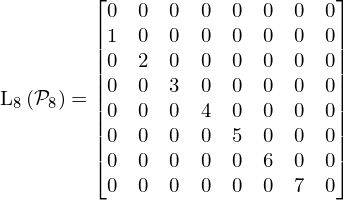

In [35]:
P_log = G_log(P)
P_log

In [36]:
inspect(P_log.rhs[1:,:-1])

nature(is_ordinary=False, is_exponential=True)

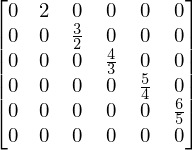

In [37]:
production_matrix(P_log.rhs[1:,:-1])

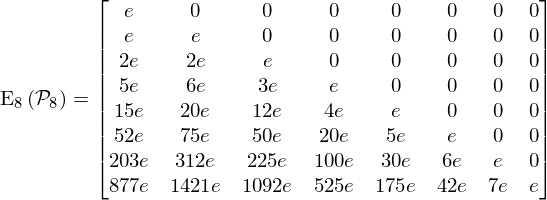

In [38]:
P_exp_dirty = define(P_exp.lhs, P_exp.rhs.subs({alpha:1}))
#P_exp_dirty = define(P_exp_dirty.lhs, Matrix(m, m, lambda i,j: exp(1) if i == j else P_exp_dirty.rhs[i,j]/exp(1)))
P_exp_dirty

In [39]:
P_exp_eigendata = spectrum(P_exp_dirty)
P_exp_eigendata

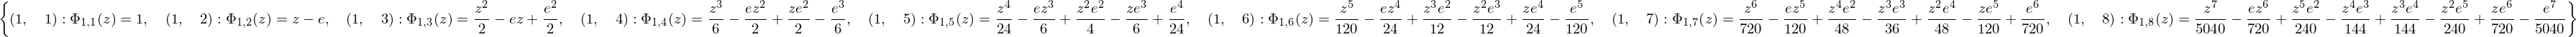

In [40]:
P_exp_Phi_polynomials = component_polynomials(P_exp_eigendata, early_eigenvals_subs=True)
P_exp_Phi_polynomials

In [41]:
f_log_dirty, g_log_dirty, G_log_dirty = functions_catalog.log(P_exp_eigendata, P_exp_Phi_polynomials)

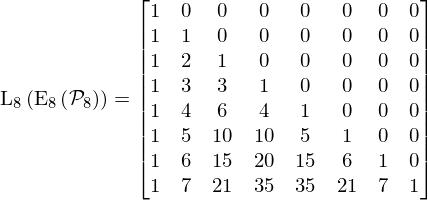

In [42]:
G_log_dirty(P_exp_dirty)

In [43]:
P_log_eigendata = spectrum(P_log)
P_log_eigendata

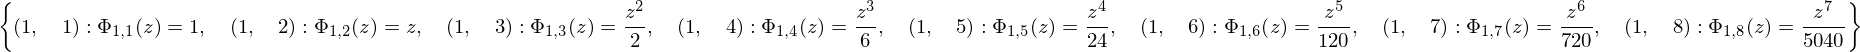

In [44]:
P_log_Phi_polynomials = component_polynomials(P_log_eigendata, early_eigenvals_subs=True)
P_log_Phi_polynomials

In [45]:
f_exp_dirty, g_exp_dirty, G_exp_dirty = functions_catalog.exp(P_log_eigendata, P_log_Phi_polynomials)

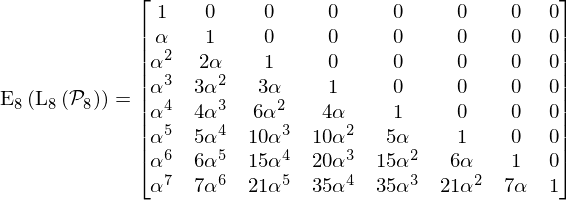

In [46]:
G_exp_dirty(P_log)

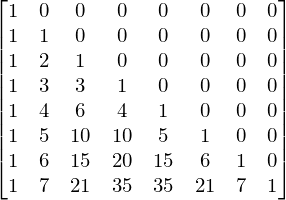

In [47]:
_.rhs.subs({alpha:1})

## `sin` function

In [48]:
f_sin, g_sin, G_sin = functions_catalog.sin(eigendata, Phi_polynomials)

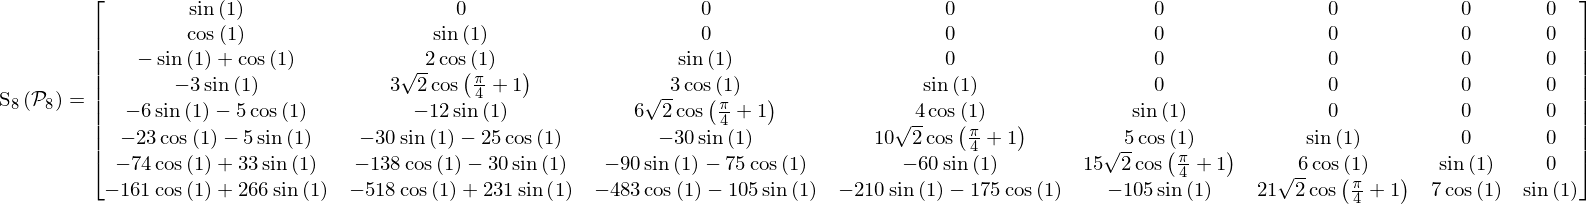

In [49]:
P_sin = G_sin(P)    
P_sin

In [ ]:
production_matrix(P_sin.rhs).applyfunc(simplify) # takes long to evaluate

## `cos` function

In [50]:
f_cos, g_cos, G_cos = functions_catalog.cos(eigendata, Phi_polynomials)

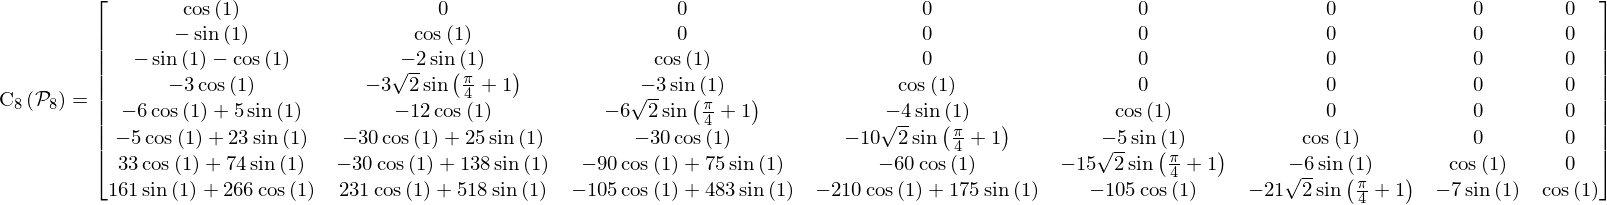

In [51]:
P_cos = G_cos(P)    
P_cos

In [ ]:
production_matrix(P_sin).applyfunc(simplify) # takes long to evaluate

In [52]:
assert (P_sin.rhs**2 + P_cos.rhs**2).applyfunc(trigsimp) == Matrix(m,m, identity_matrix()) # sin^2 + cos^2 = 1

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.